# Loading All Data

GOAL: Load data.  Join data.  check data coverage.  Trim down file size.  Preliminary plots

This looks at the StormEvent data.  The data starts in 1950, and runs till today.  As discussed on the webpage, the amount of information tracked has changed over time.  In the 50s only tornados were tracked, and was expanded further in the 60s.  

That was downloaded from the command line using:  
"wget ftp://ftp.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_*.csv.gz"
(Mostly because the filenames include a modified date, which has very little pattern to it, meaning wildcards are necessary.  Command-line wget plays nice with "*", but python's version does not).

The main files for each year are details, locations, and fatalities.
Details contains the broadest summary, and covers the longest period of time (and the one I think we should focus on.) 
Locations seems to contain more detailed location information than is already in details.
Fatalities includes statistics on each person who died (age, sex, location) for each event.  
The total fatalities are already included in details.  (Perhaps a bit too morbid to focus on that)

The formatting information is included in Storm-Data-Export-Format.docx, which details each field, and possible entry types.  



This file is going to make a dict of dataframes - one for each file type. Each year is appended to the relevant dataframe.
I'm going to try running some consistency checks on the data (missing fields, redundant data).  Currently the full details file compresses down to 250MB, which is a bit large.  Dropping some fields reduces this to 50MB.  An even smaller set (10MB) would probably be nice too. 

In [13]:
ls data

Storm-Data-Export-Format.docx
StormEvents_details-ftp_v1.0_d1950_c20170120.csv.gz
StormEvents_details-ftp_v1.0_d1951_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1952_c20170619.csv.gz
StormEvents_details-ftp_v1.0_d1953_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1954_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1955_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1956_c20170717.csv.gz
StormEvents_details-ftp_v1.0_d1957_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1958_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1959_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1960_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1961_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1962_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1963_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1964_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1965_c20170619.csv.gz
StormEvents_details-ftp_v1.0_d1966_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1967_c20160223.csv.gz
StormEvents_details-ftp_v1.0_d1968

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns',None)

In [2]:
#grab list of all files.
file_list=os.listdir('data')

file_df=pd.DataFrame(file_list,columns=['file_name'])

In [3]:
#only keep the StormEvent files, since also have some READMEs
file_msk=file_df['file_name'].str.contains('StormEvents')
file_df=file_df.loc[file_msk]

#search file names for field like "d2008", extract that value, and return as numpy array.
#creates new column
file_df['year']=file_df['file_name'].str.extract('d([0-9]+)_',expand=True).values.astype(int)
file_df['type']=file_df['file_name'].str.extract('StormEvents_(\w+)\-',expand=True).values


In [5]:
def get_all_years(file_df):
    """get_all_years(file_df)
    Calls get_one_year for all years in the dataframe file_df
    Outputs: df_dict - a dict of dataframes.
    """
    name_list=['details','fatalities','locations']
    df_dict={}
    #initialize empty dataframes
    for name in name_list:
        df_dict[name]=pd.DataFrame()

    year_arr=file_df['year'].values
    #now loop through extracting each
    year_min=year_arr.min()
    year_max=year_arr.max()
    for year in range(year_min,year_max+1):
        new_dict=get_one_year(file_df,year)
        for name in name_list:
            df_dict[name]=df_dict[name].append(new_dict[name])
    return df_dict
        
def get_one_year(file_df,year=2005):
    """get_one_year
    Read in all files for a single year. 
    Input: file_df - dataframe with filenames, years and type of series
    
    Output: dict of dataframes loaded from csv
    """
    name_list=['details','fatalities','locations']
    df_dict={}
    year_str=str(year)
    #initialize empty dataframes
    for name in name_list:
        df_dict[name]=pd.DataFrame()

    for name in name_list:
        msk1=file_df['year']==year
        msk2=file_df['type']==name
        print(year,name)
        if (sum(msk1&msk2)>0):
            file_name='data/'+file_df.loc[msk1&msk2]['file_name'].values[0]
            print(file_name)
            df=pd.read_csv(file_name)
            df_dict[name]=df
    return df_dict
    

In [45]:
%pdb off

Automatic pdb calling has been turned OFF


In [123]:
?pd.read_csv

In [6]:
#around 2GB in memory
test_dict=get_all_years(file_df)

1950 details
data/StormEvents_details-ftp_v1.0_d1950_c20170120.csv.gz
1950 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1950_c20170120.csv.gz
1950 locations
data/StormEvents_locations-ftp_v1.0_d1950_c20170120.csv.gz
1951 details
data/StormEvents_details-ftp_v1.0_d1951_c20160223.csv.gz
1951 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1951_c20160223.csv.gz
1951 locations
data/StormEvents_locations-ftp_v1.0_d1951_c20160223.csv.gz
1952 details
data/StormEvents_details-ftp_v1.0_d1952_c20170619.csv.gz
1952 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1952_c20170619.csv.gz
1952 locations
data/StormEvents_locations-ftp_v1.0_d1952_c20170619.csv.gz
1953 details
data/StormEvents_details-ftp_v1.0_d1953_c20160223.csv.gz
1953 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1953_c20160223.csv.gz
1953 locations
data/StormEvents_locations-ftp_v1.0_d1953_c20160223.csv.gz
1954 details
data/StormEvents_details-ftp_v1.0_d1954_c20160223.csv.gz
1954 fatalities
data/StormEvents_fatalities-ftp_v1

1988 details
data/StormEvents_details-ftp_v1.0_d1988_c20170717.csv.gz
1988 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1988_c20170717.csv.gz
1988 locations
data/StormEvents_locations-ftp_v1.0_d1988_c20170717.csv.gz
1989 details
data/StormEvents_details-ftp_v1.0_d1989_c20170717.csv.gz
1989 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1989_c20170717.csv.gz
1989 locations
data/StormEvents_locations-ftp_v1.0_d1989_c20170717.csv.gz
1990 details
data/StormEvents_details-ftp_v1.0_d1990_c20170717.csv.gz
1990 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1990_c20170717.csv.gz
1990 locations
data/StormEvents_locations-ftp_v1.0_d1990_c20170717.csv.gz
1991 details
data/StormEvents_details-ftp_v1.0_d1991_c20170717.csv.gz
1991 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1991_c20170717.csv.gz
1991 locations
data/StormEvents_locations-ftp_v1.0_d1991_c20170717.csv.gz
1992 details
data/StormEvents_details-ftp_v1.0_d1992_c20170717.csv.gz
1992 fatalities
data/StormEvents_fatalities-ftp_v1

/home/jonathan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


1996 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1996_c20170717.csv.gz
1996 locations
data/StormEvents_locations-ftp_v1.0_d1996_c20170717.csv.gz
1997 details
data/StormEvents_details-ftp_v1.0_d1997_c20170717.csv.gz


/home/jonathan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


1997 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1997_c20170717.csv.gz
1997 locations
data/StormEvents_locations-ftp_v1.0_d1997_c20170717.csv.gz
1998 details
data/StormEvents_details-ftp_v1.0_d1998_c20170717.csv.gz
1998 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1998_c20170717.csv.gz
1998 locations
data/StormEvents_locations-ftp_v1.0_d1998_c20170717.csv.gz
1999 details
data/StormEvents_details-ftp_v1.0_d1999_c20170717.csv.gz
1999 fatalities
data/StormEvents_fatalities-ftp_v1.0_d1999_c20170717.csv.gz
1999 locations
data/StormEvents_locations-ftp_v1.0_d1999_c20170717.csv.gz
2000 details
data/StormEvents_details-ftp_v1.0_d2000_c20170717.csv.gz
2000 fatalities
data/StormEvents_fatalities-ftp_v1.0_d2000_c20170717.csv.gz
2000 locations
data/StormEvents_locations-ftp_v1.0_d2000_c20170717.csv.gz
2001 details
data/StormEvents_details-ftp_v1.0_d2001_c20170717.csv.gz
2001 fatalities
data/StormEvents_fatalities-ftp_v1.0_d2001_c20170717.csv.gz
2001 locations
data/StormEvents_locations-ft

/home/jonathan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2006 fatalities
data/StormEvents_fatalities-ftp_v1.0_d2006_c20170717.csv.gz
2006 locations
data/StormEvents_locations-ftp_v1.0_d2006_c20170717.csv.gz
2007 details
data/StormEvents_details-ftp_v1.0_d2007_c20170717.csv.gz
2007 fatalities
data/StormEvents_fatalities-ftp_v1.0_d2007_c20170717.csv.gz
2007 locations
data/StormEvents_locations-ftp_v1.0_d2007_c20170717.csv.gz
2008 details
data/StormEvents_details-ftp_v1.0_d2008_c20170718.csv.gz
2008 fatalities
data/StormEvents_fatalities-ftp_v1.0_d2008_c20170718.csv.gz
2008 locations
data/StormEvents_locations-ftp_v1.0_d2008_c20170718.csv.gz
2009 details
data/StormEvents_details-ftp_v1.0_d2009_c20170816.csv.gz
2009 fatalities
data/StormEvents_fatalities-ftp_v1.0_d2009_c20170816.csv.gz
2009 locations
data/StormEvents_locations-ftp_v1.0_d2009_c20170816.csv.gz
2010 details
data/StormEvents_details-ftp_v1.0_d2010_c20170726.csv.gz
2010 fatalities
data/StormEvents_fatalities-ftp_v1.0_d2010_c20170726.csv.gz
2010 locations
data/StormEvents_locations-ft

In [17]:
#get shapes for each
for key, df in test_dict.items():
    print(key, df.shape)
    print(df.head(),'\n')


details (1471788, 51)
   BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  END_TIME  \
0           195004         28        1445         195004       28      1445   
1           195004         29        1530         195004       29      1530   
2           195007          5        1800         195007        5      1800   
3           195007          5        1830         195007        5      1830   
4           195007         24        1440         195007       24      1440   

   EPISODE_ID  EVENT_ID         STATE  STATE_FIPS  YEAR MONTH_NAME EVENT_TYPE  \
0         NaN  10096222      OKLAHOMA        40.0  1950      April    Tornado   
1         NaN  10120412         TEXAS        48.0  1950      April    Tornado   
2         NaN  10104927  PENNSYLVANIA        42.0  1950       July    Tornado   
3         NaN  10104928  PENNSYLVANIA        42.0  1950       July    Tornado   
4         NaN  10104929  PENNSYLVANIA        42.0  1950       July    Tornado   

  CZ_TYPE  CZ_FI

In [3]:
#from earlier dump to csv for same joint details dataframe.
df_det=pd.read_csv('joint_data/details.csv.gz')

/home/jonathan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,26,27,29,30,35,36,38,40,41,43,44,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


So around 1.5M rows in details, with initially 50 columns. Data goes back to 1950s.
So, lots of redundant columns (particularly for dates).  Lots of missing values.  
Location data only starts in 1996.  

In [48]:
def check_number_missing(df_det):
    """
    check_number_missing 

    Attempts to run checks on quality/consistency of data.
    Check for NaN by checking elementwise for equality.  Then negate to find NAN.
    Finds fraction of missing values in a column
    """
    nrow,_=df_det.shape
    for col in df_det.columns:
        msk=~(df_det[col]==df_det[col])
        print(col+' missing:',(np.sum(msk,axis=0)/nrow))

for key,df in test_dict.items():
    print(key)
    check_number_missing(df)


details
BEGIN_DAY missing: 0.0
BEGIN_TIME missing: 0.0
EPISODE_ID missing: 0.157793785518
EVENT_ID missing: 0.0
STATE missing: 6.79445681036e-07
STATE_FIPS missing: 6.79445681036e-07
YEAR missing: 0.0
MONTH_NAME missing: 0.0
EVENT_TYPE missing: 0.0
CZ_TYPE missing: 0.0
CZ_FIPS missing: 0.0
CZ_TIMEZONE missing: 0.0
INJURIES_DIRECT missing: 0.0
INJURIES_INDIRECT missing: 0.0
DEATHS_DIRECT missing: 0.0
DEATHS_INDIRECT missing: 0.0
DAMAGE_PROPERTY missing: 0.337155215289
DAMAGE_CROPS missing: 0.413422992985
SOURCE missing: 0.234996480471
MAGNITUDE missing: 0.408230669091
MAGNITUDE_TYPE missing: 0.773457182692
FLOOD_CAUSE missing: 0.954456076555
TOR_F_SCALE missing: 0.955225888511
TOR_LENGTH missing: 0.821615613118
TOR_WIDTH missing: 0.821615613118
BEGIN_LAT missing: 0.381531851055
BEGIN_LON missing: 0.381531851055
EPISODE_NARRATIVE missing: 0.32552786135
EVENT_NARRATIVE missing: 0.541848418386
DATA_SOURCE missing: 0.0
fatalities
FAT_YEARMONTH missing: 0.0
FAT_DAY missing: 0.0
FAT_TIME miss

Will focus mostly on details data.  We need to trim this down a bit.  (Around 250MB compressed).
- There's a lot of redundant columns.  Multiple formats for dates, the end/begin fields too.
- for dates, keep year, month, day, time fields for beginning.  Ditch the rest (and combo field like datetime)
-category is a mystery, even to NWS.  
- The tornado data are also seem to mostly be missing - this is for the "tor_other" fields where a tornado crosses a boundary between states/field offices.  Could be trimmed.  Could also trim out ending position data.  
- Perhaps I've misunderstood the data, and there is some information in the (range, azimuth, location) triple, which  is not in the (lat, lon) tuple.  I think that's mostly for spotting things like tornados.  
- Should check that beginning is mostly a superset of end data.  

In [19]:
df_det=test_dict['details']

In [50]:
def check_beginning_end_overlap(df):
    #grab a list of column names that start with "BEGIN_"
    begin_end_tags=df.columns.str.extract('BEGIN_([A-z]+)',expand=False)
    #only keep the matches
    msk=(begin_end_tags==begin_end_tags)
    begin_end_tags=begin_end_tags[msk]
    for tag in begin_end_tags:
        begin_tag = 'BEGIN_'+tag
        end_tag = 'END_'+tag
        #make logical values for when the values are present
        begin=df[begin_tag]==df[begin_tag]
        end = df[end_tag]==df[end_tag]
        begin_tot = begin.sum()
        end_tot = end.sum()

        begin_AND_end_tot = (begin & end).sum()
        #count number of trues for each type
        print("{}, num_begin:{}, num_end:{}" .format(tag,begin_tot,end_tot))
        #count number in both, and only in one
        print("begin AND end:{}, begin XOR end:{}".format( (begin & end).sum(), (begin ^ end).sum()))
        #count number of A and NOT B, and (B and not A) 
        print("begin AND NOT end:{},  end AND NOT : {}\n".format( (begin & ~end).sum(),(end & ~begin).sum()))
check_beginning_end_overlap(df_det)

YEARMONTH, num_begin:1471788, num_end:1471788
begin AND end:1471788, begin XOR end:0
begin AND end:0, begin XOR end:0

DAY, num_begin:1471788, num_end:1471788
begin AND end:1471788, begin XOR end:0
begin AND end:0, begin XOR end:0

TIME, num_begin:1471788, num_end:1471788
begin AND end:1471788, begin XOR end:0
begin AND end:0, begin XOR end:0

DATE_TIME, num_begin:1471788, num_end:1471788
begin AND end:1471788, begin XOR end:0
begin AND end:0, begin XOR end:0

RANGE, num_begin:793693, num_end:793316
begin AND end:790336, begin XOR end:6337
begin AND end:3357, begin XOR end:2980

AZIMUTH, num_begin:574973, num_end:561892
begin AND end:558446, begin XOR end:19973
begin AND end:16527, begin XOR end:3446

LOCATION, num_begin:825878, num_end:786522
begin AND end:786055, begin XOR end:40290
begin AND end:39823, begin XOR end:467

LAT, num_begin:910254, num_end:732764
begin AND end:732764, begin XOR end:177490
begin AND end:177490, begin XOR end:0

LON, num_begin:910254, num_end:732765
begin 

So dates have full coverage.  Assumption that beginning is a superset of end is not fully justified.  THeres a few cases of an ending value that are not present in the beginning.  In order to get this out, I'm going to IGNORE THAT, and ditch some of those values.  

So we'll drop all "end_" variables.  We'll also drop the "tor_other" variables.  Observing office, Category

In [51]:
df_det['CZ_NAME']

0             WASHITA
1            COMANCHE
2              LEHIGH
3             DAUPHIN
4            CRAWFORD
5               BUCKS
6           LANCASTER
7               BERKS
8              HUGHES
9           PITTSBURG
10           CIMARRON
11           NUCKOLLS
12           OKLAHOMA
13          PITTSBURG
14            LINCOLN
15              TULSA
16              KIOWA
17              KIOWA
18             HUGHES
19               COAL
20             CUSTER
21            BECKHAM
22           WOODWARD
23              ELLIS
24              PAYNE
25         KINGFISHER
26             RANKIN
27             RANKIN
28               CLAY
29         TISHOMINGO
              ...    
1471758       GREELEY
1471759       FORREST
1471760     HUMPHREYS
1471761       FORREST
1471762        COPIAH
1471763       LINCOLN
1471764      HERKIMER
1471765      HERKIMER
1471766      HEMPHILL
1471767        CARSON
1471768          GRAY
1471769     MIDDLESEX
1471770        VALLEY
1471771      HERKIMER
1471772   

In [4]:
drop_col=['BEGIN_YEARMONTH','END_YEARMONTH','END_DAY', 'END_TIME','WFO',
'BEGIN_DATE_TIME', 'END_DATE_TIME','CATEGORY',
'TOR_OTHER_WFO','TOR_OTHER_CZ_STATE','TOR_OTHER_CZ_FIPS','TOR_OTHER_CZ_NAME',
'BEGIN_RANGE','BEGIN_AZIMUTH','BEGIN_LOCATION',
'END_RANGE','END_AZIMUTH','END_LOCATION',
'END_LAT','END_LON']

df_det_trim=df_det.drop(drop_col,axis=1)

In [5]:
df_det_trim.columns

Index(['Unnamed: 0', 'BEGIN_DAY', 'BEGIN_TIME', 'EPISODE_ID', 'EVENT_ID',
       'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE',
       'CZ_FIPS', 'CZ_NAME', 'CZ_TIMEZONE', 'INJURIES_DIRECT',
       'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT',
       'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE',
       'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'TOR_F_SCALE', 'TOR_LENGTH',
       'TOR_WIDTH', 'BEGIN_LAT', 'BEGIN_LON', 'EPISODE_NARRATIVE',
       'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [6]:
#So the "damage" values come with postfixes K,M,B.
#Let's grab those with a regex, and find the unique values
prop_letter=df_det['DAMAGE_PROPERTY'].str.extract('([A-z]+)',expand=True)
crops_letter=df_det['DAMAGE_CROPS'].str.extract('([A-z]+)',expand=True)

In [7]:
unique_prop_letter=pd.unique(prop_letter[0])
unique_crops_letter=pd.unique(crops_letter[0])
print(unique_prop_letter,unique_crops_letter)

['K' 'M' nan 'B' 'h' 'H'] [nan 'K' 'M' 'k' 'T' 'B']


In [271]:
#Holy crap, a T.  What does that mean? Trillion

msk1=df_det2['DAMAGE_CROPS'].str.contains('T', na=False).values

#find nans via checking equality and negating because pandas is brilliant.
#msk_nan=~(msk1==msk1)
#Note that NaN evaluates to True in python, so we must now find all true values
#msk1_b=msk1.astype(bool)
#then find the one is not a nan
#msk3=(msk1_b & ~msk_nan)
df_det2.loc[msk1]

       BEGIN_DAY  BEGIN_TIME  EPISODE_ID  EVENT_ID       STATE  STATE_FIPS  \
39659         18         700   2054631.0   5578493  CALIFORNIA         6.0   

       YEAR MONTH_NAME EVENT_TYPE CZ_TYPE  CZ_FIPS CZ_TIMEZONE  \
39659  1996    October   Wildfire       C       53         PST   

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
39659                0                  0              0                0   

      DAMAGE_PROPERTY DAMAGE_CROPS SOURCE  MAGNITUDE MAGNITUDE_TYPE  \
39659           12.3M           0T    NaN        NaN            NaN   

      FLOOD_CAUSE TOR_F_SCALE  TOR_LENGTH  TOR_WIDTH  BEGIN_LAT  BEGIN_LON  \
39659         NaN         NaN         NaN        NaN        NaN        NaN   

                                                                                         EPISODE_NARRATIVE  \
39659  This fire known as the Big Sur fire began Oct 18 near Ventana Camp Park. Much of the fire occurr...   

      EVENT_NARRATIVE DATA_SOURCE 

In [ ]:
Hmm.  0T =0.  Ugh.  

In [8]:
def change_postfix(ser):
    """change_postfix
    Replaces all letter postfixes by appropriate numbers

    h -> 100
    k -> 1000
    M ->1E6
    B ->1E9
    T ->1E12

    Input: ser - pandas series
    Output fixed_ser - numpy array of fixed values
    """
    #get the numbers
    num=ser.str.extract('([0-9\.]+)',expand=False).astype(float)
    #get the letters
    mul = np.ones(num.shape)
    #['K' 'M' nan 'B' 'h' 'H'] [nan 'K' 'M' 'k' 'T' 'B']    
    mul[ser.str.contains('[hH]',na=False)]=100
    mul[ser.str.contains('[kK]',na=False)]=1000
    mul[ser.str.contains('[M]',na=False)]=1E6
    mul[ser.str.contains('[B]',na=False)]=1E9
    mul[ser.str.contains('[T]',na=False)]=1E12
    num_out=(num*mul)
    return num_out

In [9]:
dmg_crops=change_postfix(df_det['DAMAGE_CROPS'])
dmg_prop=change_postfix(df_det['DAMAGE_PROPERTY'])

In [10]:
df_det_trim['DAMAGE_CROPS']=dmg_crops
df_det_trim['DAMAGE_PROPERTY']=dmg_prop

In [11]:
df_det_trim.tail()

,Unnamed: 0,BEGIN_DAY,BEGIN_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,BEGIN_LAT,BEGIN_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
1471783,56845,21,1048,120083.0,719531,IOWA,19.0,2017,August,Hail,C,119,LYON,CST-6,0,0,0,0,0.0,0.0,Trained Spotter,1.00,NaN,NaN,NaN,NaN,NaN,43.4300,-96.1700,Storms developed during the overnight hours with a few of those storms producing wind and hail. ...,NaN,CSV
1471784,56846,21,1057,120083.0,719533,IOWA,19.0,2017,August,Hail,C,143,OSCEOLA,CST-6,0,0,0,0,0.0,0.0,Public,0.88,NaN,NaN,NaN,NaN,NaN,43.4000,-95.7300,Storms developed during the overnight hours with a few of those storms producing wind and hail. ...,Reported by the Emergency Manager.,CSV
1471785,56847,12,1625,120278.0,720673,CALIFORNIA,6.0,2017,August,Thunderstorm Wind,C,73,SAN DIEGO,PST-8,0,0,0,0,15000.0,0.0,Trained Spotter,56.00,EG,NaN,NaN,NaN,NaN,32.9156,-116.2443,A weak monsoon pattern that had persisted for several days produced 2 separate isolated supercel...,"A trained spotter in Canebrake reported two car ports destroyed, numerous large tree limbs down ...",CSV
1471786,56848,12,1630,120278.0,720675,CALIFORNIA,6.0,2017,August,Flash Flood,C,73,SAN DIEGO,PST-8,0,0,0,0,5000.0,0.0,Trained Spotter,NaN,NaN,Heavy Rain,NaN,NaN,NaN,32.9181,-116.2540,A weak monsoon pattern that had persisted for several days produced 2 separate isolated supercel...,"Several roads were washed out in Canebrake, while rocks and debris covered a section of the S2. ...",CSV
1471787,56849,12,1610,120278.0,720679,CALIFORNIA,6.0,2017,August,Flash Flood,C,73,SAN DIEGO,PST-8,0,0,0,0,5000.0,0.0,County Official,NaN,NaN,Heavy Rain,NaN,NaN,NaN,33.0425,-116.1047,A weak monsoon pattern that had persisted for several days produced 2 separate isolated supercel...,Rain rates exceeding 1 inch per hour produced major flooding in the Fish Creek Wash. Flow filled...,CSV


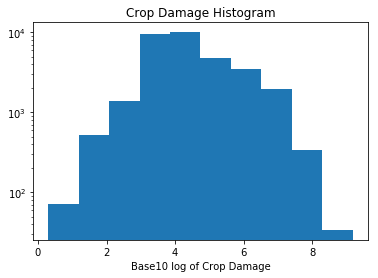

In [64]:
plt.hist(np.log10(dmg_crops[dmg_crops>0]),log=True)
plt.title('Crop Damage Histogram')
plt.xlabel('Base10 log of Crop Damage')
plt.show()

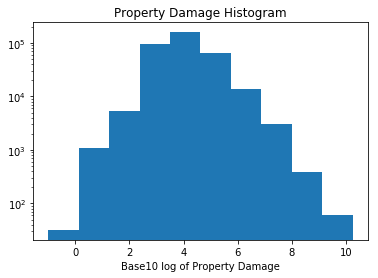

In [65]:
plt.hist(np.log10(dmg_prop[dmg_prop>0]),log=True)
plt.title('Property Damage Histogram')
plt.xlabel('Base10 log of Property Damage')
plt.show()

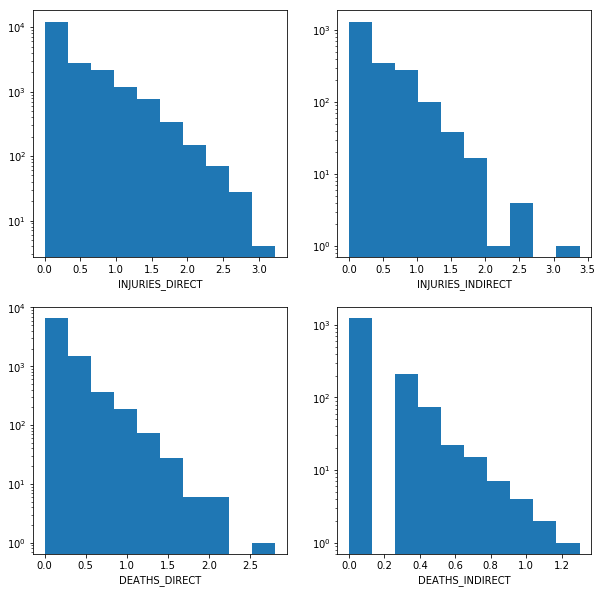

In [69]:
name_list=['INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT']
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    name=name_list[i]
    msk=df_det[name]>0
    plt.hist(np.log10(df_det.loc[msk,name]),log=True)
    plt.xlabel(name)

plt.show()

In [12]:
#Write to compressed csv.
#test_dict['fatalities'].to_csv('joint_data/fatalities.csv.gz',compression='gzip')

df_det_trim.to_csv('joint_data/detail_trim.csv.gz',compression='gzip')

In [15]:
df_det_trim.columns

Index(['Unnamed: 0', 'BEGIN_DAY', 'BEGIN_TIME', 'EPISODE_ID', 'EVENT_ID',
       'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE',
       'CZ_FIPS', 'CZ_NAME', 'CZ_TIMEZONE', 'INJURIES_DIRECT',
       'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT',
       'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE',
       'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'TOR_F_SCALE', 'TOR_LENGTH',
       'TOR_WIDTH', 'BEGIN_LAT', 'BEGIN_LON', 'EPISODE_NARRATIVE',
       'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

So some mismatch in number of rows, locations, and fatalities.

In [14]:
?pd.DataFrame.to_csv

In [37]:
drop_more_col=['Unnamed: 0','EPISODE_NARRATIVE','EVENT_NARRATIVE','CZ_TYPE','CZ_NAME','CZ_FIPS','STATE_FIPS','SOURCE','DATA_SOURCE','MAGNITUDE','MAGNITUDE_TYPE','FLOOD_CAUSE','TOR_F_SCALE','TOR_LENGTH','TOR_WIDTH']

In [38]:
df_det_trim_more=df_det_trim.drop(drop_more_col,axis=1)
df_det_trim_more.columns

Index(['BEGIN_DAY', 'BEGIN_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'YEAR',
       'MONTH_NAME', 'EVENT_TYPE', 'CZ_TIMEZONE', 'INJURIES_DIRECT',
       'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT',
       'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'BEGIN_LAT', 'BEGIN_LON'],
      dtype='object')

In [39]:
df_det_trim_more.to_csv('joint_data/detail_trim_most.csv.gz',compression='gzip',index=False)

In [41]:
df_det_trim_more.head(n=100)

,BEGIN_DAY,BEGIN_TIME,EPISODE_ID,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_LAT,BEGIN_LON
0,28,1445,NaN,10096222,OKLAHOMA,1950,April,Tornado,CST,0,0,0,0,250000.0,NaN,35.12,-99.20
1,29,1530,NaN,10120412,TEXAS,1950,April,Tornado,CST,0,0,0,0,25000.0,NaN,31.90,-98.60
2,5,1800,NaN,10104927,PENNSYLVANIA,1950,July,Tornado,CST,2,0,0,0,25000.0,NaN,40.58,-75.70
3,5,1830,NaN,10104928,PENNSYLVANIA,1950,July,Tornado,CST,0,0,0,0,2500.0,NaN,40.60,-76.75
4,24,1440,NaN,10104929,PENNSYLVANIA,1950,July,Tornado,CST,0,0,0,0,2500.0,NaN,41.63,-79.68
5,29,1600,NaN,10104930,PENNSYLVANIA,1950,August,Tornado,CST,0,0,0,0,2500.0,NaN,40.22,-75.00
6,4,1700,NaN,10104931,PENNSYLVANIA,1950,November,Tornado,CST,1,0,0,0,250000.0,NaN,40.20,-76.12
7,4,1730,NaN,10104932,PENNSYLVANIA,1950,November,Tornado,CST,0,0,0,0,250000.0,NaN,40.27,-76.07
8,15,1745,NaN,10099490,OKLAHOMA,1950,September,Tornado,CST,6,0,0,0,250000.0,NaN,35.00,-96.25
9,16,130,NaN,10099491,OKLAHOMA,1950,September,Tornado,CST,0,0,0,0,250.0,NaN,34.83,-95.85


In [29]:
df_det_trim.groupby('EVENT_TYPE').apply(len)

EVENT_TYPE
Astronomical Low Tide                499
Avalanche                            597
Blizzard                           12388
Coastal Flood                       2577
Cold/Wind Chill                    13160
Debris Flow                          842
Dense Fog                          11917
Dense Smoke                           37
Drought                            52122
Dust Devil                           211
Dust Storm                           975
Excessive Heat                      7027
Extreme Cold/Wind Chill            10567
Flash Flood                        76657
Flood                              45988
Freezing Fog                         387
Frost/Freeze                       10686
Funnel Cloud                        7912
HAIL FLOODING                          1
HAIL/ICY ROADS                         1
Hail                              351079
Heat                               18416
Heavy Rain                         21858
Heavy Snow                         57077
Heavy